In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [4]:
def min_max_scaler(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

def standard_scaler(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

In [5]:
path = "preprocessed3.csv"
df = pd.read_csv(path, index_col=0)
df.columns.values.tolist().index('rain_sum (mm)')
y = df.iloc[:,df.columns.values.tolist().index('rain_sum (mm)')]
Xtrain = df.drop(columns='rain_sum (mm)')

In [6]:
columnnew = {}
for i,column in enumerate(Xtrain.columns):
    columnnew[column] = min_max_scaler(Xtrain[column])

X = pd.DataFrame(columnnew)
X.describe()

,year,month,day,daysince,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
count,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,...,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000,13198.000000
mean,0.336490,0.466179,0.490605,0.365154,0.771406,0.820746,0.759326,0.796579,0.525718,0.003551,...,0.101455,0.099864,0.099864,0.100015,0.099333,0.099409,0.099864,0.099409,0.101303,0.099485
std,0.267262,0.308011,0.293326,0.213132,0.186553,0.197840,0.205119,0.217254,0.199280,0.022239,...,0.301941,0.299829,0.299829,0.300032,0.299120,0.299222,0.299829,0.299222,0.301741,0.299323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.233333,0.179994,0.705370,0.726979,0.680247,0.682256,0.419803,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.454545,0.500000,0.363033,0.854862,0.930533,0.856790,0.918845,0.568476,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.727273,0.733333,0.545102,0.889695,0.949919,0.896296,0.946355,0.663788,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#test pred
test = "preprocessedtest2.csv"
df = pd.read_csv(test, index_col=0)
columnnew = {}
for i,column in enumerate(df.columns):
    columnnew[column] = (df[column] - Xtrain[column].min()) / (Xtrain[column].max() - Xtrain[column].min())

xpred = pd.DataFrame(columnnew)
xpred.head()

,year,month,day,daysince,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,0.75,0.636364,0.033333,0.116768,0.904209,0.948304,0.901235,0.932600,0.641271,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.75,0.636364,0.066667,0.117322,0.895501,0.951535,0.891358,0.942228,0.617212,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.75,0.636364,0.100000,0.117875,0.908563,0.954766,0.887654,0.949106,0.644355,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.75,0.636364,0.133333,0.118428,0.899855,0.954766,0.883951,0.953232,0.684454,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.75,0.636364,0.166667,0.118982,0.898403,0.964459,0.874074,0.960110,0.673658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


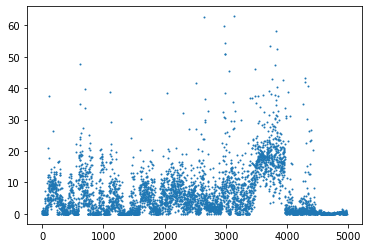

In [61]:

testpred = mlp.predict(xpred)
predictions = pd.DataFrame(list(map(lambda x: x if x > 0 else 0, testpred)))
plt.scatter(range(len(predictions)),predictions,s = 1)
predictions.to_csv('pred2.csv')

In [5]:
def nn(X,y,hidden,iter,solv='adam',act='logistic'):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create an instance of the MLPRegressor
    mmlp = MLPRegressor(hidden_layer_sizes=hidden, max_iter=iter, random_state=0,solver=solv,activation=act,
    learning_rate_init=0.001, beta_1=0.9, beta_2=0.99, alpha=0.005)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    y_predtrain = mlp.predict(X_train)

    # Calculate the MSE on the test set
    msetrain = mean_squared_error(y_train, y_predtrain)
    # print('mse train: ',msetrain)
    mse = mean_squared_error(y_test, y_pred)
    # print('mse test: ',mse)
    loss = mlp.best_loss_
    # print("best loss: ", loss)
    return mse

mse train:  33.7781759519077
mse test:  42.20158357484885
loss =  16.42503297136505
R2 =  0.5703917572416415


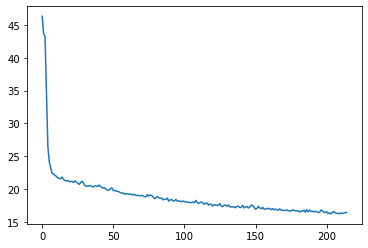

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(80,50,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.005)
# mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_predtrain = mlp.predict(X_train)

# Calculate the MSE on the test set
msetrain = mean_squared_error(y_train, y_predtrain)
print('mse train: ',msetrain)

mse = mean_squared_error(y_test, y_pred)
print('mse test: ',mse)

epoch = range(mlp.n_iter_)
plt.plot(epoch, mlp.loss_curve_)

loss = mlp.loss_
print('loss = ',loss)

r_squared = mlp.score(X_test, y_test)
print ('R2 = ', r_squared)


In [ ]:

# mlp = MLPRegressor(hidden_layer_sizes=(20), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.99, alpha=0.005), R2 =  0.5806964713151754
# mlp = MLPRegressor(hidden_layer_sizes=(100), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.99, alpha=0.005) , R2 =  0.5812683441828551
# mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.99, alpha=0.005) , R2 =  0.5900805335559639
# mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.005) , R2 =  0.6008927420367851
# mlp = MLPRegressor(hidden_layer_sizes=(70,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.005) , R2 =  0.6134754256308285


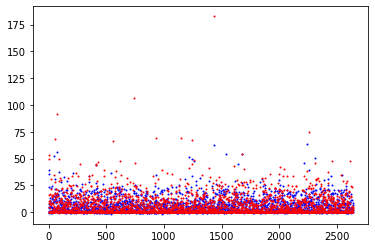

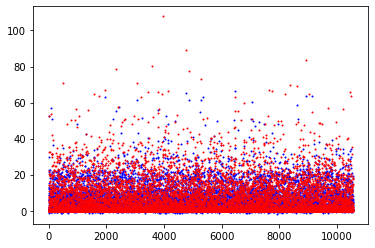

In [11]:
plt.scatter(range(len(y_pred)),y_pred,s=1,c='blue')
plt.scatter(range(len(y_test)),y_test,s=1,c='red')
plt.show()
plt.scatter(range(len(y_predtrain)),y_predtrain,s=1,c='blue')
plt.scatter(range(len(y_train)),y_train,s=1,c='red')
plt.show()